In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tqdm import tqdm
from src.util import read_video
from src.model import Model

video, fps = read_video("./videos/test3.mp4")
video = video[:50]

In [3]:
from src.depth.vda import VideoDepthAnythingModel

vda = VideoDepthAnythingModel(device="cuda")
raw_depths = list(tqdm(vda.create_stream(video), total=len(video)))

  0%|          | 0/50 [00:00<?, ?it/s]

518


  2%|▏         | 1/50 [00:14<12:12, 14.95s/it]

tensor([[[[nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          ...,
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan]]],


        [[[nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          ...,
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan]]],


        [[[nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          ...,
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan]]],


        ...,


        [[[nan, nan, nan,  ..., nan, nan, nan],
          [nan, 

100%|██████████| 50/50 [00:29<00:00,  1.67it/s]


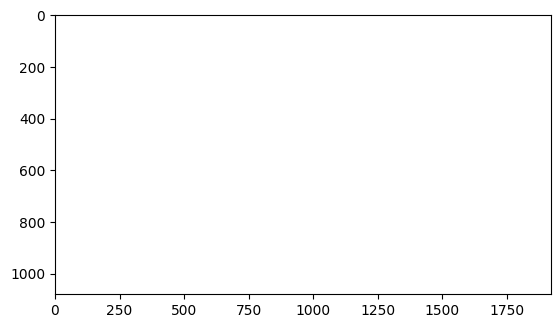

In [4]:
# max_depth = max(d.max() for d in raw_depths)
# depths = [max_depth - d for d in raw_depths]

from matplotlib import pyplot as plt

# print(raw_depths[0])
plt.imshow(raw_depths[10])
# depths = [-d for d in raw_depths]

In [ ]:
model = Model(processing_shape=(384, 640))

preds = tqdm(model.infer(video, fps=fps,
             depth_stream=depths), total=len(video))
vis = list(model.visualize(preds))

write_video("./vis.mp4", vis, fps)

In [23]:
import av
from matplotlib import pyplot as plt
import numpy as np

container = av.open("./videos/test1.mkv")

for frame in container.decode(video=0):
    # print(frame.to_ndarray().shape)
    print(frame.to_ndarray())
    # plt.imshow(np.asarray(frame.to_image()))
    break

In [ ]:
from __future__ import division

import cv2
import numpy as np


frames, fps = read_video("./vis.mp4")
# write_video("./test.webm", "webm", frames, fps)

r = cv2.resize(frames[0], (100, 100))

plt.imshow(r)

In [ ]:
from scipy.signal import savgol_filter
from numpy.polynomial.polynomial import Polynomial

# xs = np.linspace(-2, 2, 5)
# # print(xs)
# # np.polynomial.polynomial.fit()
# ys = n

# def sav_gol(xs, wi):


# plt.plot(xs, ns)

# poly = np.polynomial.polynomial.Polynomial.fit(xs, ys, 4)

def sav_gol(xs, win_size, deg, deriv=0, delta=1):
    assert win_size % 2 == 1

    h = (win_size-1)//2

    win = np.linspace(-h, h, win_size)

    out = [0] * h

    for i in range(h, len(xs) - h):
        poly = Polynomial.fit(win, xs[i-h:i+h+1], deg)

        for _ in range(deriv):
            poly = poly.deriv()

        out.append(poly(0) / (delta**deriv))

    out += [0] * h

    return out


def fn(xs):
    # return np.sin(xs)
    return np.where(xs > 0, xs, 0)


def fn_der(xs):
    # return np.cos(xs)
    return xs > 0


xs = np.linspace(-10, 10, 1000)
ys = fn(xs)
ns = ys + np.random.normal(size=len(xs)) / 10

# print(ys)

ws = 99
deg = 4
der = 1

plt.plot(xs, ns)
plt.plot(xs, fn_der(xs))
plt.plot(xs, sav_gol(ns, ws, deg, der, delta=xs[1]-xs[0]))
plt.show()

plt.plot(xs, ns)
plt.plot(xs, fn_der(xs))
plt.plot(xs, savgol_filter(ns, ws, deg, der, delta=xs[1]-xs[0]))
plt.show()